#CTC Prediction Using Linear Regression

**Problem Statement 1**

Your task is to help John from STA IT services to create a linear regression model in Python or R to predict the CTC/Salary of new hires from the data provided. Here is a snapshot of the case.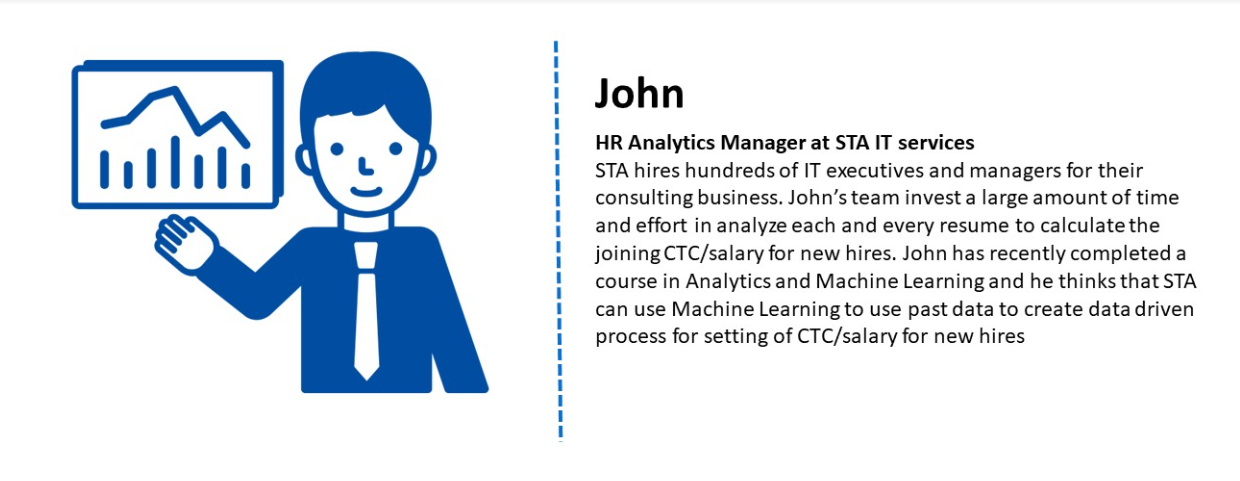


Your task is to

1. Understand the data


2.   Transform categorical variables to the numerical variables.
3.   Apply linear regression to predict the CTC.
4.   Evaluate the results of the analysis.

Excel data files are provided to you to help you with the assignment. [(Data_file.xlsx)](https://docs.google.com/spreadsheets/d/1bcOXd9dFhgxsmonqC0TtFLQrAKfzxQNL/edit?usp=sharing&ouid=106115340208586563833&rtpof=true&sd=true)

Data_file is a dataset that you will use to train your model.

Test Data files:

[(Test_data_file.xlsx)](https://docs.google.com/spreadsheets/d/1rsyHvyjVzl8YoIzRgyqNTxJIVUoNhivL/edit?usp=sharing&ouid=106115340208586563833&rtpof=true&sd=true)

Test_Data_file is a dataset that you will use to test your model and find out the Mean Square Value.



#Import Libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# to displays all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("max_colwidth", -1)

#Load Data

In [ ]:
train = pd.read_excel('/content/Data_file.xlsx')

In [ ]:
train.drop('S.No.', inplace=True, axis=1)

Checking and visualising data

In [ ]:
train.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


Checking for Null values

In [ ]:
train.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [ ]:
train.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [ ]:
train.nunique()

College                 3   
Role                    2   
City type               2   
Previous CTC            1308
Previous job changes    4   
Graduation marks        51  
Exp (Months)            47  
CTC                     1338
dtype: int64

#Data Visualization

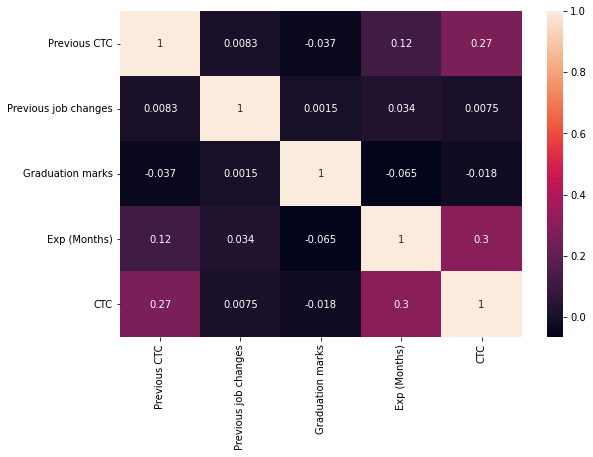

In [ ]:
plt.figure(figsize=(9, 6))
sns.heatmap(train.corr(), annot=True)
plt.show()

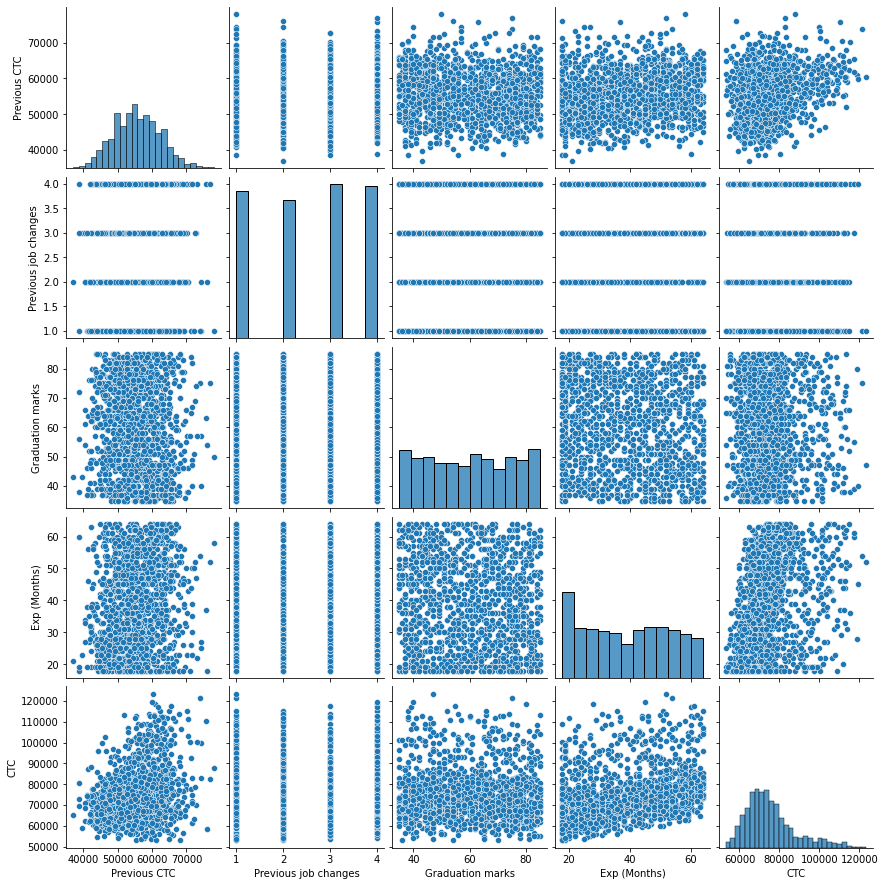

In [ ]:
sns.pairplot(data = train)

In [ ]:
test= pd.read_excel('/content/Test_data_file.xlsx')

In [ ]:
test.head(10)

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN,NaN,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tier 2,Executive,Non-Metro,0,1,0,0,54340,4,73,31,59950.892245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Tier 2,Executive,Non-Metro,0,1,0,0,60298,1,42,46,66602.339307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Tier 3,Executive,Non-Metro,0,0,0,0,49944,2,56,37,57768.435037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Tier 1,Executive,Metro,1,0,0,1,53124,4,40,37,70083.304362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tier 3,Executive,Non-Metro,0,0,0,0,51141,1,47,60,85648.481469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


#Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn

In [ ]:
train_college = train["College"]
c_dum = pd.get_dummies(train_college)

In [ ]:
train_role = train["Role"]
role_dum = pd.get_dummies(train_role)

In [ ]:
train_city = train["City type"]
city_dum = pd.get_dummies(train_city)

In [ ]:
train_main = pd.concat([city_dum, c_dum, role_dum, train], join='outer', axis=1)

In [ ]:
train_main.head()

,Metro,Non-Metro,Tier 1,Tier 2,Tier 3,Executive,Manager,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,0,1,1,0,0,0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,1,0,0,1,0,1,0,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,1,0,0,1,0,1,0,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,1,0,0,0,1,1,0,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,1,0,0,0,1,1,0,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [ ]:
def clean_dataset(train_main):
  assert isinstance(train_main, pd.DataFrame), "df needs to be a pd.DataFrame"
  train_main.dropna(inplace= True)
  indices_to_keep = ~train_main.isin([np.nan, np.inf, -np.inf]).any(1)
  return train_main[indices_to_keep].astype(np.float64)

In [ ]:
train_main = train_main.fillna(-1)
test = test.fillna(-1)

In [ ]:
set(train_main.columns).symmetric_difference(set(test.columns))

{'Actual CTC',
 'CTC',
 'City_Metro',
 'College_T1',
 'College_T2',
 'Executive',
 'Exp',
 'Exp (Months)',
 'Manager',
 'Metro',
 'Non-Metro',
 'Predicted CTC',
 'Previous CTC',
 'Previous job changes',
 'Role_Manager',
 'Tier 1',
 'Tier 2',
 'Tier 3',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'previous CTC',
 'previous job changes'}

In [ ]:
test_main = test.drop({"Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20","Unnamed: 21","Unnamed: 22","Unnamed: 23","Predicted CTC","College","Role","City type","Actual CTC"},axis=1)

In [ ]:
y_train = train_main['CTC']
train_main = train_main.drop({"City type","College","Role","City type","CTC","Non-Metro","Executive","Tier 3"},axis=1)

In [ ]:
train_main.head()

,Metro,Tier 1,Tier 2,Manager,Previous CTC,Previous job changes,Graduation marks,Exp (Months)
0,0,1,0,1,55523,3,66,19
1,1,0,1,0,57081,1,84,18
2,1,0,1,0,60347,2,52,28
3,1,0,0,0,49010,2,81,33
4,1,0,0,0,57879,4,74,32


In [ ]:
y_train = [float(str(i).replace(",", "")) for i in y_train]

In [ ]:
train_main["Previous CTC"] = [float(str(i).replace(",", "")) for i in train_main["Previous CTC"]]

In [ ]:
reg = LinearRegression().fit(train_main, y_train)

In [ ]:
reg.score(train_main, y_train)*100

60.81873160506195

In [ ]:
train_main.head()

,Metro,Tier 1,Tier 2,Manager,Previous CTC,Previous job changes,Graduation marks,Exp (Months)
0,0,1,0,1,55523.0,3,66,19
1,1,0,1,0,57081.0,1,84,18
2,1,0,1,0,60347.0,2,52,28
3,1,0,0,0,49010.0,2,81,33
4,1,0,0,0,57879.0,4,74,32


In [ ]:
pred = reg.predict(test_main)

In [ ]:
submission = pd.DataFrame(pred, columns = ['Predicted CTC'])
submission

,Predicted CTC
0,65352.565188
1,86560.919480
2,90713.063254
3,82122.405017
4,85836.128395
5,69282.439680
6,76057.487363
7,64311.320435
8,89188.263303
9,70869.424363


In [ ]:
submission.to_csv('submission.csv',index=False)